# IMPORT DATA DEPENDENCIES

In [ ]:
#DATA DEPENDECIES
import pandas as pd
import numpy as np
from google.colab import drive
import yfinance as yf
from datetime import datetime, date
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from scipy.special import softmax

# UPLOADING DATA


In [ ]:
#UPLOADING DATA
df_thesis = pd.read_csv("/content/all_companies_tweets_thesis.csv")

#NUMBER OF TWEETS
print(df_thesis.shape[0])

3326194


# FILTERING DATA

In [ ]:
amazon_filter = (df_thesis['amazon'] == True)
condition = (df_thesis['retweet_num'] >= 30) | (df_thesis['like_num'] >= 50)
amazon_reduced = df_thesis.loc[amazon_filter & condition].reset_index()
amazon_reduced.shape

(2890, 14)

In [ ]:
df_thesis.loc[amazon_filter].shape

(695755, 13)

In [ ]:
tesla_filter = (df_thesis['tesla'] == True)
condition = (df_thesis['retweet_num'] >= 100) | (df_thesis['like_num'] >= 200)
tesla_reduced = df_thesis.loc[tesla_filter & condition].reset_index()
tesla_reduced.shape

(2904, 14)

In [ ]:
df_thesis.loc[tesla_filter].shape

(1028255, 13)

In [ ]:
apple_filter = (df_thesis['apple'] == True)
condition = (df_thesis['retweet_num'] >= 30) | (df_thesis['like_num'] >= 50)
apple_reduced = df_thesis.loc[apple_filter & condition].reset_index()
apple_reduced.shape

(4080, 14)

In [ ]:
df_thesis.loc[apple_filter].shape

(1274464, 13)

In [ ]:
microsoft_filter = (df_thesis['microsoft'] == True)
condition = (df_thesis['retweet_num'] >= 30) | (df_thesis['like_num'] >= 50)
microsoft_reduced = df_thesis.loc[microsoft_filter & condition].reset_index()
microsoft_reduced.shape

(1000, 14)

In [ ]:
df_thesis.loc[microsoft_filter].shape

(340719, 13)

In [ ]:
google_filter = (df_thesis['google'] == True)
condition = (df_thesis['retweet_num'] >= 30) | (df_thesis['like_num'] >= 50)
google_reduced = df_thesis.loc[google_filter & condition].reset_index()
google_reduced.shape

(1481, 14)

In [ ]:
df_thesis.loc[google_filter].shape

(427746, 13)

In [ ]:
#ADJUSTING NETFLIX
netflix = np.zeros(df_thesis.shape[0],dtype=bool)
for i in range(df_thesis.shape[0]):
  if "netflix" in df_thesis.text[i].lower():
    netflix[i] = True

df_thesis["netflix"] = netflix

In [ ]:
netflix_filter = (df_thesis['netflix'] == True)
condition = (df_thesis['retweet_num'] >= 5) | (df_thesis['like_num'] >= 5)
netflix_reduced = df_thesis.loc[netflix_filter & condition]
netflix_reduced.shape

(942, 14)

In [ ]:
df_thesis.loc[netflix_filter].shape

(12396, 14)

# Augumented Dicky Fuller Test (stationarity test)

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries,verbose=False):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')

    # Extract and print results
    print('Results of Dickey-Fuller Test:')
    df_test = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        df_test['Critical Value (%s)'%key] = value
    if verbose:
      print(df_test)
    if df_test[1] <= 0.05:
      print(f"Series is STATIONARY at 5%, p-value is {df_test[1]}")
    else:
      print(f"Series is NOT STATIONARY at 5%, p-value is {df_test[1]}")

In [ ]:
#LOAD PRICE DATA
apple_data_daily = yf.download("AAPL", start="2015-01-01", end="2019-12-31", interval='1d')
apple_data_daily.reset_index(inplace=True)
amazon_data_daily = yf.download("AMZN", start="2015-01-01", end="2019-12-31", interval='1d')
amazon_data_daily.reset_index(inplace=True)
tesla_data_daily = yf.download("TSLA", start="2015-01-01", end="2019-12-31", interval='1d')
tesla_data_daily.reset_index(inplace=True)
microsoft_data_daily = yf.download("MSFT", start="2015-01-01", end="2019-12-31", interval='1d')
microsoft_data_daily.reset_index(inplace=True)
google_data_daily = yf.download("GOOG", start="2015-01-01", end="2019-12-31", interval='1d')
google_data_daily.reset_index(inplace=True)
netflix_data_daily = yf.download("NFLX", start="2015-01-01", end="2019-12-31", interval='1d')
netflix_data_daily.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
apple_data_daily

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373953,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687311,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689535,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021711,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944681,237458000
...,...,...,...,...,...,...,...
1252,2019-12-23,70.132500,71.062500,70.092499,71.000000,68.908989,98572000
1253,2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974487,48478800
1254,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342972,93121200
1255,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316261,146266000


In [ ]:
# TRANSFORM ALL STOCK MASKS TO BOOLEAN DATATYPE
df_thesis[["apple","amazon","tesla","microsoft","google","netflix", "None"]] = df_thesis[["apple","amazon","tesla","microsoft","google","netflix","None"]].astype(bool)
df_thesis.head()

,post_date,text,comment_num,retweet_num,like_num,ticker_symbol,date,apple,amazon,tesla,microsoft,google,None,netflix
0,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,True,False,False,False,False,False,False
1,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,True,False,False,False,False,False,False
2,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01,False,True,False,False,False,False,False
3,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01,False,False,True,False,False,False,False
4,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,True,False,True,False,False,False,False


In [ ]:
#COMPUTE TOTAL NUMER OF DAILY TWEETS
def tweet_daily_frequency(df, stock=""):
  label = stock
  stock = df[df[label]==True]
  stock = stock.sort_values(by="post_date", ascending=True)
  stock.reset_index(inplace=True)
  stock = stock.groupby(stock.date).sum()
  stock_grouped = stock[[label]]
  return stock_grouped, label

In [ ]:
#COMPUTE DAILY FREQUENCY OF SENTIMENT DIFFERENTIAL BETWEEN POSITIVE AND NEGATIVE LABELED TWEETS
def tweet_daily_frequency_sentiment_diferential(df, stock=""):
  label = stock
  stocks = df.sort_values(by="post_date", ascending=True)
  stocks.reset_index(inplace=True)
  stock = stock[[label]]

  stock_p = stock[(stock[label]==True) & (stock.sentiment=="positive")]
  stock_n = stock[(stock[label]==True) & (stock.sentiment=="negative")]
  stock_pp = stock_p.groupby(stock.date).sum()
  stock_nn = -1*stock_n.groupby(stock.date).sum()
  stock_grouped = stock[[label]]
  return stock_grouped, label

In [ ]:
apple_grouped, apple_label = tweet_daily_frequency(df_thesis,"apple")
amazon_grouped, amazon_label = tweet_daily_frequency(df_thesis,"amazon")
tesla_grouped, tesla_label = tweet_daily_frequency(df_thesis,"tesla")
microsoft_grouped, microsoft_label = tweet_daily_frequency(df_thesis,"microsoft")
google_grouped, google_label = tweet_daily_frequency(df_thesis,"google")
netflix_grouped, netflix_label = tweet_daily_frequency(df_thesis,"netflix")

In [ ]:
def leftjoin_on_price(prices,sentiments_grouped):
  # Join the two DataFrames on the 'date' column
  price = prices[["Date","Adj Close"]]
  print(price.shape[0])
  sentiments_grouped.index = pd.to_datetime(sentiments_grouped.index)
  sentiments_grouped.reset_index(inplace=True)
  print(sentiments_grouped.shape[0])
  # By default, it's an inner join, meaning it keeps only the common dates
  merged_df = pd.merge(price, sentiments_grouped, left_on='Date', right_on = "date", how='left')
  merged_df.info()
  return merged_df

In [ ]:
#NO nan positions for the stock data
apple_merged = leftjoin_on_price(apple_data_daily,apple_grouped)
amazon_merged = leftjoin_on_price(amazon_data_daily,amazon_grouped)
tesla_merged = leftjoin_on_price(tesla_data_daily,tesla_grouped)
microsoft_merged = leftjoin_on_price(microsoft_data_daily,microsoft_grouped)
google_merged = leftjoin_on_price(google_data_daily,google_grouped)
netflix_merged = leftjoin_on_price(netflix_data_daily,netflix_grouped)

1257
1826
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1257 non-null   datetime64[ns]
 1   Adj Close  1257 non-null   float64       
 2   date       1257 non-null   datetime64[ns]
 3   apple      1257 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 39.4 KB
1257
1826
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1257 non-null   datetime64[ns]
 1   Adj Close  1257 non-null   float64       
 2   date       1257 non-null   datetime64[ns]
 3   amazon     1257 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 39.4 KB
1257
1826
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257

In [ ]:
import matplotlib.ticker as ticker  # Import the ticker module

def display(data,label):
  # Create a bar plot with consistent data types
  fig, ax = plt.subplots()
  ax.bar(data.index, data[label])  # x-axis and y-axis data match and are valid
  # Labeling and control axis frequency
  ax.set_xlabel("Date")
  ax.set_ylabel("Count")
  ax.set_title(label)
  #ax.xaxis.set_major_locator(ticker.MaxNLocator(3))
  # Display the plot
  plt.show()  # Show the plot


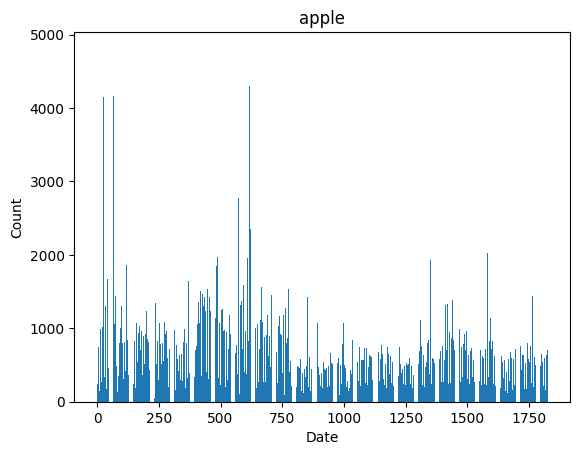

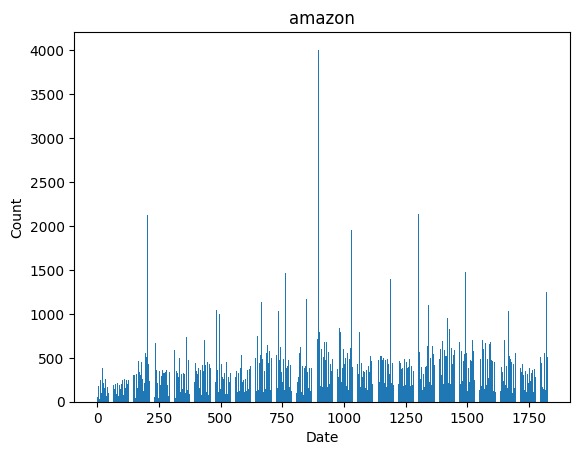

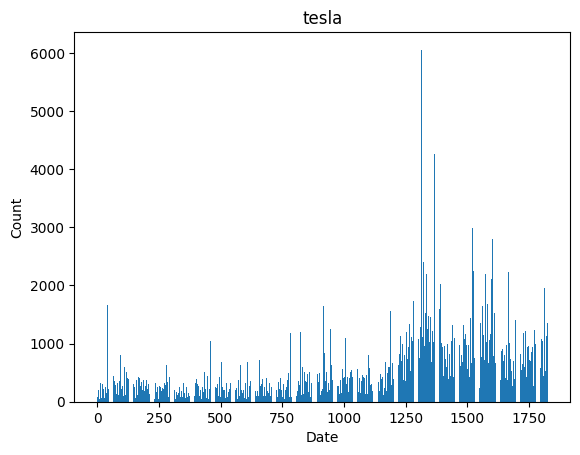

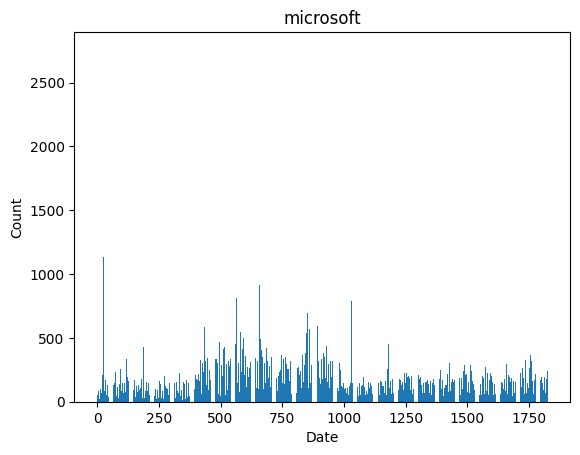

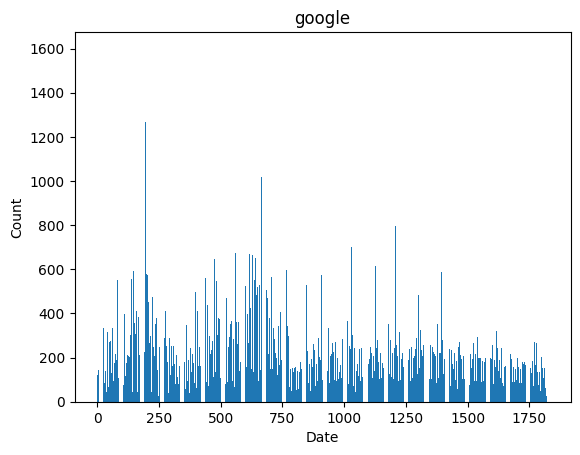

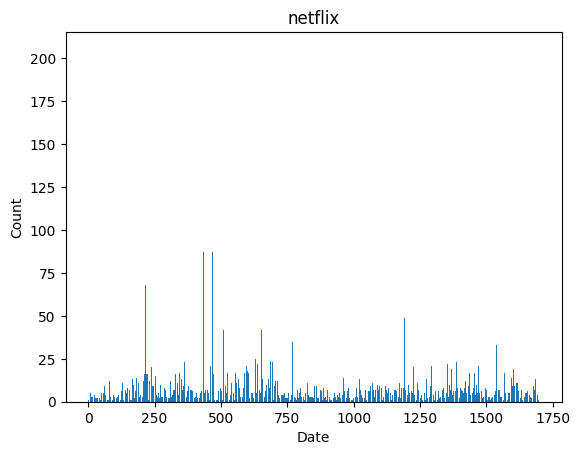

In [ ]:
# DISPLAY TOTAL DAILY FREQUENCY
display(apple_grouped, apple_label)
display(amazon_grouped, amazon_label)
display(tesla_grouped, tesla_label)
display(microsoft_grouped, microsoft_label)
display(google_grouped, google_label)
display(netflix_grouped, netflix_label)

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

def average_of_groups(array, group_size):
  means = []
  for i in range(3,len(array),group_size):
    means.append(np.mean(array[i-3:i]))
  return means

def granger_causality_test(data, max_lag):

    # Perform Granger causality test
    results = grangercausalitytests(data, max_lag, verbose=False)

    # Format results into a dictionary
    results_dict = {}
    for lag, result in results.items():
        lag_results = {}
        for test_name, test_result in result[0].items():
            lag_results[test_name] = test_result
        results_dict[lag] = lag_results

    out = []
    for r1,v1 in results_dict.items():
      for r2, v2 in v1.items():
        out.append(v2[1])

    df = pd.DataFrame()
    df["Lag"] = range(1,1+max_lag)
    df["p_values"] = average_of_groups(out,4)

    return df

# SPLINE INTERPOLATION FOR MISSING VALUES





In [ ]:
#chose interpolation method: spline interpolation with a polinomial order of 1
def interpolate(dataframe,interpolation_type="spline",order=1,company="netflix"):
  data = dataframe[["Date",company]].copy()
  data.set_index("Date", inplace=True)
  interpolated_mask = np.isnan(np.array(data.values))#~np.isnan(np.array(series.values))
  saved_indexes = list(data.index)
  # Reset the index to numeric values
  data.index = range(1, len(data) + 1)
  # Cubic interpolate missing values
  interpolated_series = data.interpolate(method=interpolation_type, order=order)
  # Set the index back to days of the week
  interpolated_series.index = saved_indexes
  # Convert back to dictionary
  interpolated_data = interpolated_series.to_dict()
  data.values[interpolated_mask] = interpolated_series.values[interpolated_mask]
  data.index = saved_indexes
  return pd.DataFrame(interpolated_data)



In [ ]:
interpolated_microsoft = interpolate(microsoft_merged,company="microsoft")
interpolated_apple = interpolate(apple_merged,company="apple")
interpolated_amazon = interpolate(amazon_merged,company="amazon")
interpolated_netflix = interpolate(netflix_merged,company="netflix")
interpolated_tesla = interpolate(tesla_merged,company="tesla")
interpolated_google = interpolate(google_merged,company="google")

In [ ]:
#DISPLAY daily total sentiments only on non-empty trading dates; EXAMPLE: NETFLIX
netflix_grouped.head()

,date,netflix
0,2015-01-02,3
1,2015-01-03,1
2,2015-01-04,2
3,2015-01-05,2
4,2015-01-06,4


In [ ]:
#DISPLAY INTERPOLATED OUTPUT; EXAMPLE: NETFLIX
interpolated_netflix.head()

,netflix
2015-01-02,3.000000
2015-01-05,2.000000
2015-01-06,4.000000
2015-01-07,4.206900
2015-01-08,4.802961


In [ ]:
#CONVERT PRICES INTO LOG RETURNS
def calculate_log_returns(prices):
    log_returns = np.log(prices / prices.shift(1))
    return log_returns

# STATIONARITY TEST

In [ ]:
#STATIONARITY TEST
from statsmodels.tsa.stattools import adfuller

# Define a function for Dickey-Fuller test - stationarity test
def adf_test(timeseries,verbose=False):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')

    # Extract and print results
    print('Results of Dickey-Fuller Test:')
    df_test = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        df_test['Critical Value (%s)'%key] = value
    if verbose:
      print(df_test)
    if df_test[1] <= 0.05:
      print(f"Series is STATIONARY at 5%, p-value is {df_test[1]}")
    else:
      print(f"Series is NOT STATIONARY at 5%, p-value is {df_test[1]}")

# GRANGER CAUSALITY

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

def average_of_groups(array, group_size):
  means = []
  for i in range(3,len(array),group_size):
    means.append(np.mean(array[i-3:i]))
  return means

def granger_causality_test(data, max_lag):
    # Perform Granger causality test
    results = grangercausalitytests(data, max_lag, verbose=False)

    # Format results into a dictionary
    results_dict = {}
    for lag, result in results.items():
        lag_results = {}
        for test_name, test_result in result[0].items():
            lag_results[test_name] = test_result
        results_dict[lag] = lag_results

    out = []
    for r1,v1 in results_dict.items():
      for r2, v2 in v1.items():
        out.append(v2[1])

    df = pd.DataFrame()
    df["Lag"] = range(1,max_lag+1)
    df["p_values"] = average_of_groups(out,4)

    return df

In [ ]:
def plot_lag_p_values3(lag_p_values, name="",columns=['p_values_S_R', 'p_values_R_S', 'p_values_S_R_RETweight', 'p_values_R_S_RETweight'], text=["Set 1", "Set 2", "Set 3", "Set 4"]):
    # Create a new figure
    fig, ax = plt.subplots(figsize=(7, 5))

    # Extract lag values and p-values for lag_p_values
    lag_values = lag_p_values['Lag']
    p_values1 = lag_p_values[columns[0]]
    p_values2 = lag_p_values[columns[1]]
    p_values3 = lag_p_values[columns[2]]
    p_values4 = lag_p_values[columns[3]]

    # Create scatter plots for different sets
    scatter1 = ax.scatter(lag_values, p_values1, label=text[0], color='skyblue')
    scatter2 = ax.scatter(lag_values, p_values2, label=text[1], color='darkorange')
    scatter3 = ax.scatter(lag_values, p_values3, label=text[2], color='purple')
    scatter4 = ax.scatter(lag_values, p_values4, label=text[3], color='brown')

    # Add horizontal lines at heights 0.05 and 0.1
    ax.axhline(y=0.05, color='lightgreen', linestyle='--', label='0.05 significance')
    ax.axhline(y=0.1, color='green', linestyle='--', label='0.1 significance')

    # Set labels and title
    ax.set_xlabel('Lags')
    ax.set_ylabel('p-values')
    ax.set_title(f'Granger Causality - {name}')


    # Add legend outside the plot
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))  # Legend placed outside plot, to the right

    # Ensure tight layout and show plot
    plt.tight_layout()
    plt.show()


# TOTAL SENTIMENT

In [ ]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", message="verbose is deprecated since functions should not print results")

# APPLE

In [ ]:
# Data for Apple
date = apple_grouped.index[0]
prices_apple = apple_data_daily["Adj Close"]
volume_apple = apple_data_daily["Volume"]
log_returns_apple = calculate_log_returns(prices_apple)
log_returns_apple.iloc[0]=0

interpolated = interpolated_apple.apple.values  # Sentiments
delta_interpolated = np.log(interpolated[1:] / interpolated[:-1])


df_apple = pd.DataFrame(columns=['Cause', 'Effect'])
df_apple["Cause"] = interpolated # total sentiments
df_apple["Effect"] = log_returns_apple.values#stock returns
granger_apple = granger_causality_test(df_apple,max_lag=15)
granger_apple.rename(columns={'p_values': 'p_values_S_R'}, inplace=True)


df_appleR = pd.DataFrame(columns=['Cause', 'Effect'])
df_appleR["Cause"] = log_returns_apple.values #stock returns
df_appleR["Effect"] = interpolated # total sentiments
granger_appleR = granger_causality_test(df_appleR,15)
granger_appleR.rename(columns={'p_values': 'p_values_R_S'}, inplace=True)


df_appleV = pd.DataFrame(columns=['Cause', 'Effect'])
df_appleV["Cause"] = interpolated #sentiments
df_appleV["Effect"] = volume_apple.values #stock volumes
granger_appleV = granger_causality_test(df_appleV,max_lag=15)
granger_appleV.rename(columns={'p_values': 'p_values_S_V'}, inplace=True)


df_appleVR = pd.DataFrame(columns=['Cause', 'Effect'])
df_appleVR["Cause"] = volume_apple.values #stock volumes
df_appleVR["Effect"] = interpolated #sentiments
granger_appleVR = granger_causality_test(df_appleVR,max_lag=15)
granger_appleVR.rename(columns={'p_values': 'p_values_V_S'}, inplace=True)

granger_output_apple = granger_apple.merge(granger_appleR,on="Lag").merge(granger_appleV,on="Lag").merge(granger_appleVR,on="Lag")
granger_output_apple

,Lag,p_values_S_R,p_values_R_S,p_values_S_V,p_values_V_S
0,1,0.493022,0.364459,0.164571,2.097579e-05
1,2,0.729488,0.719536,0.111081,1.670153e-15
2,3,0.665854,0.891366,0.028547,2.915362e-16
3,4,0.856446,0.814822,0.045182,1.141691e-15
4,5,0.718214,0.618590,0.030355,1.536584e-14
5,6,0.546689,0.485182,0.006843,1.130904e-14
6,7,0.384485,0.149091,0.000039,4.000288e-14
7,8,0.412866,0.205123,0.000112,1.141079e-13
8,9,0.449147,0.277809,0.000045,7.102585e-14
9,10,0.468866,0.357020,0.000195,1.869725e-13


In [ ]:
#STATIONARITY TEST FOR VOLUME & SENTIMENTS
print(adf_test(interpolated)) #sentiments
print()
print(adf_test(volume_apple)) # volumes

Results of Dickey-Fuller Test:
Series is STATIONARY at 5%, p-value is 2.4698780976080815e-06
None

Results of Dickey-Fuller Test:
Series is STATIONARY at 5%, p-value is 1.230310012555157e-06
None


<ipython-input-119-db8f793c5814>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_test[1] <= 0.05:
<ipython-input-119-db8f793c5814>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Series is STATIONARY at 5%, p-value is {df_test[1]}")
<ipython-input-119-db8f793c5814>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_test[1] <= 0.05:
<ipython-input-119-db8f793c5814>:17: FutureWarning: Series.__getitem__ treating

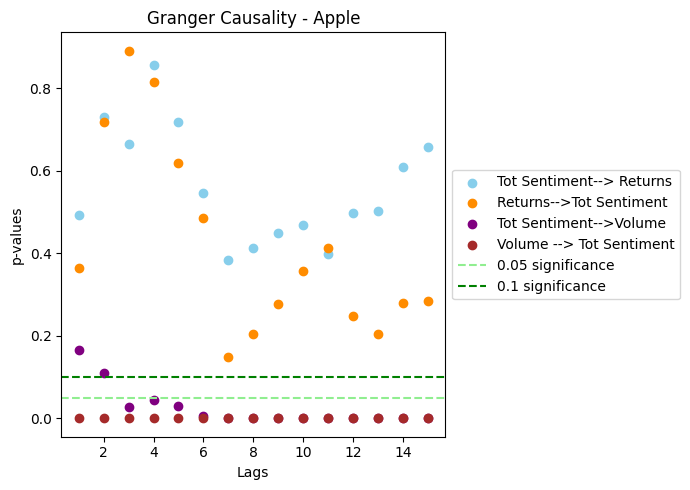

In [ ]:
plot_lag_p_values3(granger_output_apple,name="Apple",columns= ['p_values_S_R','p_values_R_S','p_values_S_V','p_values_V_S'],text=["Tot Sentiment--> Returns", "Returns-->Tot Sentiment", "Tot Sentiment-->Volume", "Volume --> Tot Sentiment"])

# TESLA

In [ ]:
# Data for Tesla
date = tesla_grouped.date[0]
prices_tesla = tesla_data_daily["Adj Close"][tesla_data_daily.Date>=date]
volume_tesla = tesla_data_daily["Volume"][tesla_data_daily.Date>=date]
log_returns_tesla = calculate_log_returns(prices_tesla)
log_returns_tesla.iloc[0]=0

df_tesla = pd.DataFrame(columns=['Cause', 'Effect'])
df_teslaR = pd.DataFrame(columns=['Cause', 'Effect'])
df_teslaV = pd.DataFrame(columns=['Cause', 'Effect'])
df_teslaVR = pd.DataFrame(columns=['Cause', 'Effect'])

interpolated = interpolated_tesla[interpolated_tesla.index >= date].tesla.values  # Sentiments
delta_interpolated = np.log(interpolated[1:] / interpolated[:-1])

df_tesla["Cause"] = delta_interpolated # delta sentiment
df_tesla["Effect"] = log_returns_tesla.values[1:]  # Stock returns
granger_tesla = granger_causality_test(df_tesla,15)
granger_tesla.rename(columns={'p_values': 'p_values_S_R'}, inplace=True)


df_teslaR["Cause"] = log_returns_tesla.values[1:]  # Stock returns
df_teslaR["Effect"] = delta_interpolated # delta sentiment
granger_teslaR = granger_causality_test(df_teslaR,15)
granger_teslaR.rename(columns={'p_values': 'p_values_R_S'}, inplace=True)


df_teslaV["Cause"] = delta_interpolated # delta sentiment
df_teslaV["Effect"] = volume_tesla.values[1:]   # Stock volume
granger_teslaV = granger_causality_test(df_teslaV,15)
granger_teslaV.rename(columns={'p_values': 'p_values_S_V'}, inplace=True)


df_teslaVR["Cause"] =  volume_tesla.values[1:] # Stock volume
df_teslaVR["Effect"] = delta_interpolated # delta sentiment
granger_teslaVR = granger_causality_test(df_teslaVR,15)
granger_teslaVR.rename(columns={'p_values': 'p_values_V_S'}, inplace=True)


granger_output_tesla = granger_tesla.merge(granger_teslaR,on="Lag").merge(granger_teslaV,on="Lag").merge(granger_teslaVR,on="Lag")
granger_output_tesla

,Lag,p_values_S_R,p_values_R_S,p_values_S_V,p_values_V_S
0,1,0.462075,0.011438,3.748080e-18,2.083753e-04
1,2,0.634630,0.033952,1.661884e-13,2.433745e-09
2,3,0.570051,0.050620,1.461624e-10,1.368234e-09
3,4,0.643202,0.085948,1.026126e-08,3.154640e-09
4,5,0.756497,0.148209,2.935171e-07,8.648724e-09
5,6,0.775145,0.203054,3.735495e-05,3.457929e-09
6,7,0.873783,0.192901,2.524885e-04,1.336266e-08
7,8,0.910570,0.298725,4.205396e-04,4.573572e-08
8,9,0.957954,0.393100,2.143465e-03,7.341646e-08
9,10,0.664334,0.459644,2.426445e-03,7.320933e-08


In [ ]:
#STATIONARITY TEST FOR VOLUME & SENTIMENTS
print(adf_test(interpolated)) #sentiments not stationary --> use the change in sentiments instead
print()
print(adf_test(volume_tesla)) # volumes

Results of Dickey-Fuller Test:
Series is NOT STATIONARY at 5%, p-value is 0.23430278940237537
None

Results of Dickey-Fuller Test:
Series is STATIONARY at 5%, p-value is 0.010791940836259103
None


<ipython-input-119-db8f793c5814>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_test[1] <= 0.05:
<ipython-input-119-db8f793c5814>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Series is NOT STATIONARY at 5%, p-value is {df_test[1]}")
<ipython-input-119-db8f793c5814>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_test[1] <= 0.05:
<ipython-input-119-db8f793c5814>:17: FutureWarning: Series.__getitem__ trea

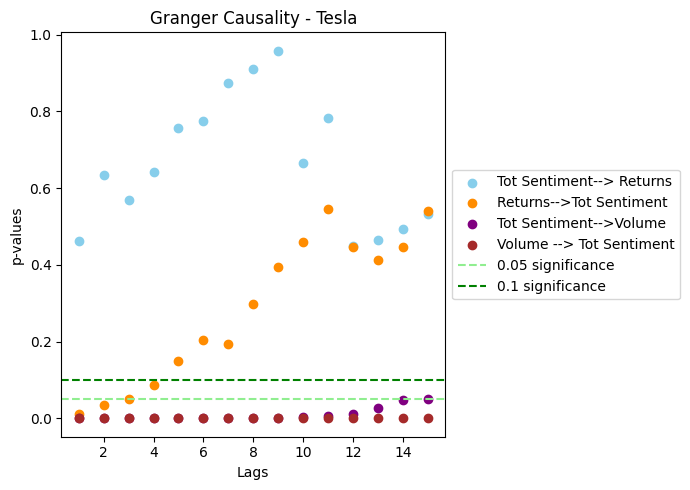

In [ ]:
plot_lag_p_values3(granger_output_tesla,name="Tesla",columns= ['p_values_S_R','p_values_R_S','p_values_S_V','p_values_V_S'],text=["Tot Sentiment--> Returns", "Returns-->Tot Sentiment", "Tot Sentiment-->Volume", "Volume --> Tot Sentiment"])

# GOOGLE: stock returns and total sentiment

In [ ]:
# Data for Google
date = "2018-01-01"
prices_google = google_data_daily["Adj Close"][google_data_daily.Date>=date]
volume_google = google_data_daily["Volume"][google_data_daily.Date>=date]

log_returns_google = calculate_log_returns(prices_google)
log_returns_google.iloc[0]=0

df_google = pd.DataFrame(columns=['Cause', 'Effect'])
df_googleR = pd.DataFrame(columns=['Cause', 'Effect'])
df_googleV = pd.DataFrame(columns=['Cause', 'Effect'])
df_googleRV = pd.DataFrame(columns=['Cause', 'Effect'])

interpolated = interpolated_google[interpolated_google.index >= date].google.values  # Sentiments
delta_sentiment = np.log(interpolated[1:] / interpolated[:-1])

df_google["Cause"] = interpolated # Sentiments
df_google["Effect"] = log_returns_google.values  # Stock returns
granger_google = granger_causality_test(df_google,15)
granger_google.rename(columns={'p_values': 'p_values_S_R'}, inplace=True)


df_googleR["Cause"] = log_returns_google.values  # Stock returns
df_googleR["Effect"] = interpolated # Sentiments
granger_googleR = granger_causality_test(df_googleR,15)
granger_googleR.rename(columns={'p_values': 'p_values_R_S'}, inplace=True)


df_googleV["Cause"] = interpolated  # sentiments
df_googleV["Effect"] = volume_google.values # stock volume
granger_googleV = granger_causality_test(df_googleV,15)
granger_googleV.rename(columns={'p_values': 'p_values_S_V'}, inplace=True)


df_googleRV["Cause"] = volume_google.values  # Stock volume
df_googleRV["Effect"] = interpolated # sentiments
granger_googleRV = granger_causality_test(df_googleRV,15)
granger_googleRV.rename(columns={'p_values': 'p_values_V_S'}, inplace=True)


granger_output_google = granger_google.merge(granger_googleR,on="Lag").merge(granger_googleV,on="Lag").merge(granger_googleRV,on="Lag")
granger_output_google

,Lag,p_values_S_R,p_values_R_S,p_values_S_V,p_values_V_S
0,1,0.257852,0.001810,0.057324,3.751260e-11
1,2,0.272816,0.001219,0.259451,5.905783e-15
2,3,0.607631,0.004493,0.294749,9.123524e-15
3,4,0.719033,0.009243,0.438261,1.901504e-15
4,5,0.816446,0.015349,0.466613,2.325428e-15
5,6,0.892834,0.025620,0.509780,1.116986e-14
6,7,0.430376,0.028377,0.491689,1.972752e-14
7,8,0.464324,0.004414,0.349723,6.530823e-14
8,9,0.527691,0.005171,0.463365,6.317627e-14
9,10,0.619686,0.009297,0.453857,9.671457e-14


In [ ]:
#STATIONARITY TEST FOR VOLUME & SENTIMENTS
print(adf_test(interpolated)) #sentiments
print()
print(adf_test(volume_tesla)) # volumes

Results of Dickey-Fuller Test:
Series is STATIONARY at 5%, p-value is 2.4369002351673404e-15
None

Results of Dickey-Fuller Test:
Series is STATIONARY at 5%, p-value is 0.010791940836259103
None


<ipython-input-119-db8f793c5814>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_test[1] <= 0.05:
<ipython-input-119-db8f793c5814>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Series is STATIONARY at 5%, p-value is {df_test[1]}")
<ipython-input-119-db8f793c5814>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_test[1] <= 0.05:
<ipython-input-119-db8f793c5814>:17: FutureWarning: Series.__getitem__ treating

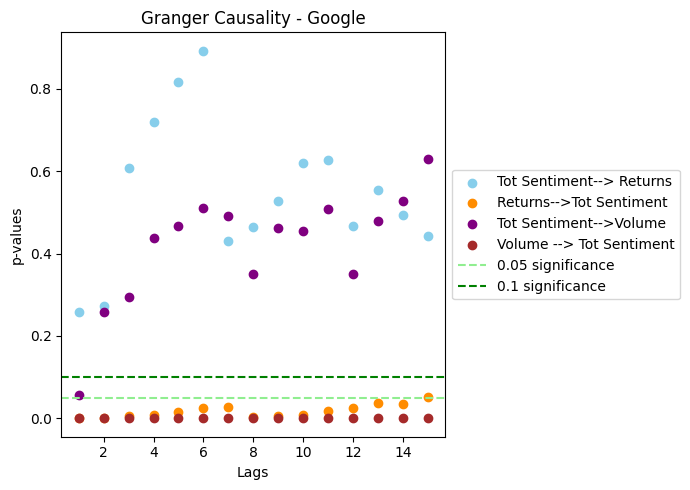

In [ ]:
plot_lag_p_values3(granger_output_google,name="Google",columns= ['p_values_S_R','p_values_R_S','p_values_S_V','p_values_V_S'],text=["Tot Sentiment--> Returns", "Returns-->Tot Sentiment", "Tot Sentiment-->Volume", "Volume --> Tot Sentiment"])

# AMAZON and total sentiment

In [ ]:
# Data for Amazon
date = "2017-06-01"
prices_amazon = amazon_data_daily["Adj Close"][amazon_data_daily.Date>=date]
volume_amazon = amazon_data_daily["Volume"][amazon_data_daily.Date>=date]
log_returns_amazon = calculate_log_returns(prices_amazon)
log_returns_amazon.iloc[0]=0

df_amazon = pd.DataFrame(columns=['Cause', 'Effect'])
df_amazonR = pd.DataFrame(columns=['Cause', 'Effect'])
df_amazonV = pd.DataFrame(columns=['Cause', 'Effect'])
df_amazonRV = pd.DataFrame(columns=['Cause', 'Effect'])

interpolated = interpolated_amazon[interpolated_amazon.index >= date].amazon.values  # Sentiments
delta_sentiment = np.log(interpolated[1:] / interpolated[:-1])

df_amazon["Cause"] = interpolated  # Sentiments
df_amazon["Effect"] = log_returns_amazon.values  # Stock returns
granger_amazon = granger_causality_test(df_amazon, 15)
granger_amazon.rename(columns={'p_values': 'p_values_S_R'}, inplace=True)


df_amazonR["Cause"] = log_returns_amazon.values  # Stock returns
df_amazonR["Effect"] = interpolated  # Sentiments
granger_amazonR = granger_causality_test(df_amazonR, 15)
granger_amazonR.rename(columns={'p_values': 'p_values_R_S'}, inplace=True)


df_amazonV["Cause"] = interpolated  # Sentiments
df_amazonV["Effect"] = volume_amazon.values  # Stock volume
granger_amazonV = granger_causality_test(df_amazonV, 15)
granger_amazonV.rename(columns={'p_values': 'p_values_S_V'}, inplace=True)

df_amazonRV["Cause"] = volume_amazon.values  # Stock volume
df_amazonRV["Effect"] = interpolated  # Sentiments
granger_amazonRV = granger_causality_test(df_amazonRV, 15)
granger_amazonRV.rename(columns={'p_values': 'p_values_V_S'}, inplace=True)

granger_output_amazon = granger_amazon.merge(granger_amazonR,on="Lag").merge(granger_amazonV,on="Lag").merge(granger_amazonRV,on="Lag")
granger_output_amazon

,Lag,p_values_S_R,p_values_R_S,p_values_S_V,p_values_V_S
0,1,0.140946,0.110973,0.009318,0.883864
1,2,0.343387,0.091355,0.043668,0.006165
2,3,0.552190,0.108573,0.111147,0.006824
3,4,0.354905,0.181716,0.083364,0.009331
4,5,0.389332,0.302655,0.146637,0.017438
5,6,0.463160,0.360634,0.151410,0.025068
6,7,0.378811,0.392569,0.211935,0.032111
7,8,0.464712,0.255382,0.283507,0.043686
8,9,0.517687,0.287694,0.338024,0.073342
9,10,0.602326,0.345496,0.140116,0.112204


In [ ]:
#STATIONARITY TEST FOR VOLUME & SENTIMENTS
print(adf_test(interpolated)) #sentiments
print()
print(adf_test(volume_amazon)) # volumes

Results of Dickey-Fuller Test:
Series is STATIONARY at 5%, p-value is 4.3953784121120815e-30
None

Results of Dickey-Fuller Test:
Series is STATIONARY at 5%, p-value is 0.0015723311310287004
None


<ipython-input-119-db8f793c5814>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_test[1] <= 0.05:
<ipython-input-119-db8f793c5814>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Series is STATIONARY at 5%, p-value is {df_test[1]}")
<ipython-input-119-db8f793c5814>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_test[1] <= 0.05:
<ipython-input-119-db8f793c5814>:17: FutureWarning: Series.__getitem__ treating

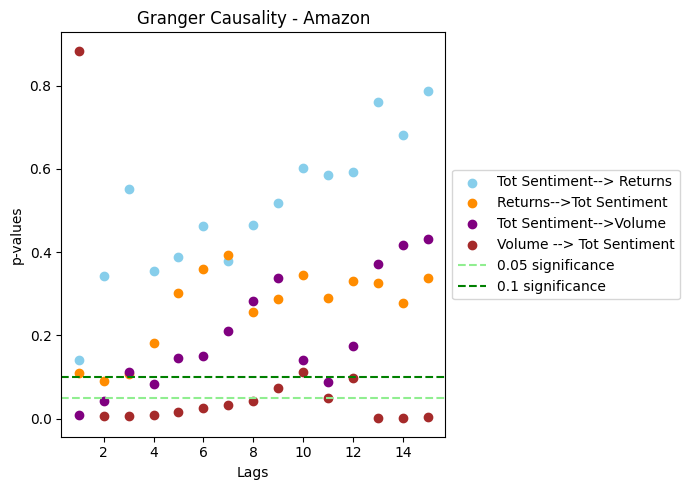

In [ ]:
plot_lag_p_values3(granger_output_amazon, name="Amazon",columns= ['p_values_S_R','p_values_R_S','p_values_S_V','p_values_V_S'],text=["Tot Sentiment--> Returns", "Returns-->Tot Sentiment", "Tot Sentiment-->Volume", "Volume --> Tot Sentiment"])

# NETFLIX

In [ ]:
# Data for Netflix
date = "2018-01-01"
prices_netflix = netflix_data_daily["Adj Close"][netflix_data_daily.Date >= date]
volume_netflix = netflix_data_daily["Volume"][netflix_data_daily.Date >= date]
log_returns_netflix = calculate_log_returns(prices_netflix)
log_returns_netflix.iloc[0] = 0

# Create DataFrames
df_netflix = pd.DataFrame(columns=['Cause', 'Effect'])
df_netflixR = pd.DataFrame(columns=['Cause', 'Effect'])
df_netflixV = pd.DataFrame(columns=['Cause', 'Effect'])
df_netflixRV = pd.DataFrame(columns=['Cause', 'Effect'])

# Interpolated data and sentiment
interpolated = interpolated_netflix[interpolated_netflix.index >= date].netflix.values  # Sentiments
delta_sentiment = np.log(interpolated[1:] / interpolated[:-1])

# Netflix data analysis
df_netflix["Cause"] = delta_sentiment  # Sentiments
df_netflix["Effect"] = log_returns_netflix.values[1:]  # Stock returns
granger_netflix = granger_causality_test(df_netflix, 15)
granger_netflix.rename(columns={'p_values': 'p_values_S_R'}, inplace=True)

# Stock returns causing sentiment
df_netflixR["Cause"] = log_returns_netflix.values[1:]  # Stock returns
df_netflixR["Effect"] = delta_sentiment  # Sentiments
granger_netflixR = granger_causality_test(df_netflixR, 15)
granger_netflixR.rename(columns={'p_values': 'p_values_R_S'}, inplace=True)

# Sentiments causing stock volume
df_netflixV["Cause"] = interpolated  # Sentiments
df_netflixV["Effect"] = volume_netflix.values  # Stock volume
granger_netflixV = granger_causality_test(df_netflixV, 15)
granger_netflixV.rename(columns={'p_values': 'p_values_S_V'}, inplace=True)

# Stock volume causing sentiment
df_netflixRV["Cause"] = volume_netflix.values  # Stock volume
df_netflixRV["Effect"] = interpolated  # Sentiments
granger_netflixRV = granger_causality_test(df_netflixRV, 15)
granger_netflixRV.rename(columns={'p_values': 'p_values_V_S'}, inplace=True)

# Merging DataFrames
granger_output_netflix = granger_netflix.merge(granger_netflixR, on="Lag").merge(granger_netflixV, on="Lag").merge(granger_netflixRV, on="Lag")
granger_output_netflix

,Lag,p_values_S_R,p_values_R_S,p_values_S_V,p_values_V_S
0,1,0.542465,0.718599,0.534904,0.122350
1,2,0.609252,0.013641,0.446574,0.000865
2,3,0.839714,0.035462,0.444492,0.002642
3,4,0.955041,0.021336,0.564948,0.000394
4,5,0.988684,0.003825,0.686390,0.000372
5,6,0.969251,0.004676,0.773517,0.000729
6,7,0.974834,0.000176,0.839220,0.001663
7,8,0.796050,0.000075,0.878729,0.003576
8,9,0.810246,0.000178,0.915186,0.007601
9,10,0.857394,0.000403,0.950973,0.009147


In [ ]:
#STATIONARITY TEST FOR VOLUME & SENTIMENTS
print(adf_test(interpolated)) #sentiments
print()
print(adf_test(volume_netflix)) # volumes

Results of Dickey-Fuller Test:
Series is STATIONARY at 5%, p-value is 6.503127806908328e-26
None

Results of Dickey-Fuller Test:
Series is STATIONARY at 5%, p-value is 8.627539187291076e-11
None


<ipython-input-119-db8f793c5814>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_test[1] <= 0.05:
<ipython-input-119-db8f793c5814>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Series is STATIONARY at 5%, p-value is {df_test[1]}")
<ipython-input-119-db8f793c5814>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_test[1] <= 0.05:
<ipython-input-119-db8f793c5814>:17: FutureWarning: Series.__getitem__ treating

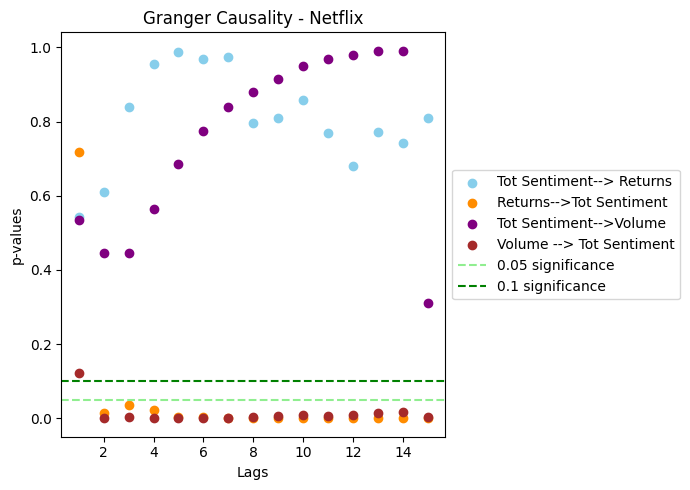

In [ ]:
plot_lag_p_values3(granger_output_netflix,name="Netflix",columns= ['p_values_S_R','p_values_R_S','p_values_S_V','p_values_V_S'],text=["Tot Sentiment--> Returns", "Returns-->Tot Sentiment", "Tot Sentiment-->Volume", "Volume --> Tot Sentiment"])

# MICROSOFT

In [ ]:
# Data for Microsoft
date = "2017-06-01"
prices_microsoft = microsoft_data_daily["Adj Close"][microsoft_data_daily.Date >= date]
volume_microsoft = microsoft_data_daily["Volume"][microsoft_data_daily.Date >= date]
log_returns_microsoft = calculate_log_returns(prices_microsoft)
log_returns_microsoft.iloc[0] = 0

# Create DataFrames for Microsoft
df_microsoft = pd.DataFrame(columns=['Cause', 'Effect'])
df_microsoftR = pd.DataFrame(columns=['Cause', 'Effect'])
df_microsoftV = pd.DataFrame(columns=['Cause', 'Effect'])
df_microsoftRV = pd.DataFrame(columns=['Cause', 'Effect'])

# Interpolated data and sentiment for Microsoft
interpolated = interpolated_microsoft[interpolated_microsoft.index >= date].microsoft.values  # Sentiments
delta_sentiment = np.log(interpolated[1:] / interpolated[:-1])

# Microsoft data analysis
df_microsoft["Cause"] = interpolated  # Sentiments
df_microsoft["Effect"] = log_returns_microsoft.values  # Stock returns
granger_microsoft = granger_causality_test(df_microsoft, 15)
granger_microsoft.rename(columns={'p_values': 'p_values_S_R'}, inplace=True)

# Stock returns causing sentiment for Microsoft
df_microsoftR["Cause"] = log_returns_microsoft.values  # Stock returns
df_microsoftR["Effect"] = interpolated  # Sentiments
granger_microsoftR = granger_causality_test(df_microsoftR, 15)
granger_microsoftR.rename(columns={'p_values': 'p_values_R_S'}, inplace=True)

# Sentiments causing stock volume for Microsoft
df_microsoftV["Cause"] = interpolated  # Sentiments
df_microsoftV["Effect"] = volume_microsoft.values  # Stock volume
granger_microsoftV = granger_causality_test(df_microsoftV, 15)
granger_microsoftV.rename(columns={'p_values': 'p_values_S_V'}, inplace=True)

# Stock volume causing sentiment for Microsoft
df_microsoftRV["Cause"] = volume_microsoft.values  # Stock volume
df_microsoftRV["Effect"] = interpolated  # Sentiments
granger_microsoftRV = granger_causality_test(df_microsoftRV, 15)
granger_microsoftRV.rename(columns={'p_values': 'p_values_V_S'}, inplace=True)

# Merging DataFrames on "Lag"
granger_output_microsoft = (
    granger_microsoft
    .merge(granger_microsoftR, on="Lag")
    .merge(granger_microsoftV, on="Lag")
    .merge(granger_microsoftRV, on="Lag")
)

granger_output_microsoft

,Lag,p_values_S_R,p_values_R_S,p_values_S_V,p_values_V_S
0,1,0.008021,0.027170,0.017422,1.008533e-01
1,2,0.023228,0.016825,0.061671,1.068217e-07
2,3,0.051068,0.027599,0.129550,1.288041e-07
3,4,0.087026,0.064666,0.221450,5.899373e-07
4,5,0.155282,0.104910,0.210539,8.497673e-07
5,6,0.187333,0.104763,0.318477,2.166589e-06
6,7,0.238203,0.160505,0.405617,3.591650e-06
7,8,0.409443,0.088134,0.320381,4.142671e-06
8,9,0.435121,0.091168,0.464412,5.924815e-06
9,10,0.505567,0.125566,0.479753,2.640522e-06


In [ ]:
#STATIONARITY TEST FOR VOLUME & SENTIMENTS
print(adf_test(interpolated)) #sentiments
print()
print(adf_test(volume_microsoft)) # volumes

Results of Dickey-Fuller Test:
Series is STATIONARY at 5%, p-value is 4.617892579077139e-15
None

Results of Dickey-Fuller Test:
Series is STATIONARY at 5%, p-value is 4.418620660879704e-09
None


<ipython-input-119-db8f793c5814>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_test[1] <= 0.05:
<ipython-input-119-db8f793c5814>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Series is STATIONARY at 5%, p-value is {df_test[1]}")
<ipython-input-119-db8f793c5814>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_test[1] <= 0.05:
<ipython-input-119-db8f793c5814>:17: FutureWarning: Series.__getitem__ treating

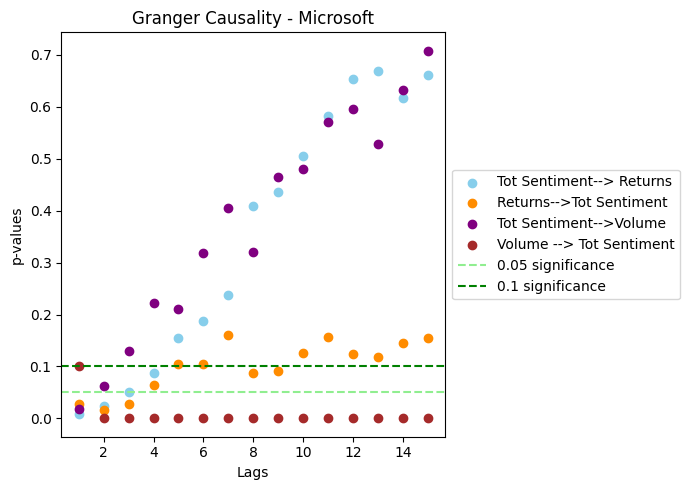

In [ ]:
plot_lag_p_values3(granger_output_microsoft,name="Microsoft",columns= ['p_values_S_R','p_values_R_S','p_values_S_V','p_values_V_S'],text=["Tot Sentiment--> Returns", "Returns-->Tot Sentiment", "Tot Sentiment-->Volume", "Volume --> Tot Sentiment"])

# DATA WITH SENTIMENT DIFFERENTIAL

---



In [ ]:
#DOWNLOAD FROM DRIVE THE CSVs
import gdown
gdown.download(id="13lFcEWhA9IP8esQZnEZQGMa_JqSQzFqa",output="netflix_reduced_sentiment.csv")
gdown.download(id="1-rnXZNPkrMZgJhMy42aXiJ4lGOJxIiOM",output="microsoft_reduced_sentiment.csv")
gdown.download(id="1x8rva0cVRGnRXQlUOtcPfFyfRG-waaYZ",output="tesla_reduced_sentiment.csv")
gdown.download(id="1nTzlBGuKr1L6DRvbuulQcNSYf_tgObUH",output="apple_reduced_sentiment.csv")
gdown.download(id="1mZd_Kd7qBkdGw7Kuo1hoD-I-HErWJPDG",output="amazon_reduced_sentiment.csv")
gdown.download(id="1TLIdL_BK8PFqbWSb5yC57ksXcpjUQa-Y",output="google_reduced_sentiment.csv")

#save them as dataframes
netflix_with_sentiment = pd.read_csv("netflix_reduced_sentiment.csv")
microsoft_with_sentiment = pd.read_csv("microsoft_reduced_sentiment.csv")
tesla_with_sentiment = pd.read_csv("tesla_reduced_sentiment.csv")
apple_with_sentiment = pd.read_csv("apple_reduced_sentiment.csv")
amazon_with_sentiment = pd.read_csv("amazon_reduced_sentiment.csv")
google_with_sentiment = pd.read_csv("google_reduced_sentiment.csv")

Downloading...
From: https://drive.google.com/uc?id=13lFcEWhA9IP8esQZnEZQGMa_JqSQzFqa
To: /content/netflix_reduced_sentiment.csv
100%|██████████| 242k/242k [00:00<00:00, 60.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-rnXZNPkrMZgJhMy42aXiJ4lGOJxIiOM
To: /content/microsoft_reduced_sentiment.csv
100%|██████████| 249k/249k [00:00<00:00, 76.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1x8rva0cVRGnRXQlUOtcPfFyfRG-waaYZ
To: /content/tesla_reduced_sentiment.csv
100%|██████████| 723k/723k [00:00<00:00, 50.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nTzlBGuKr1L6DRvbuulQcNSYf_tgObUH
To: /content/apple_reduced_sentiment.csv
100%|██████████| 971k/971k [00:00<00:00, 123MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mZd_Kd7qBkdGw7Kuo1hoD-I-HErWJPDG
To: /content/amazon_reduced_sentiment.csv
100%|██████████| 710k/710k [00:00<00:00, 94.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TLIdL_BK8PFqbWSb5yC57ksXcpjUQa-Y
To: /content/googl

In [ ]:
#DATAFRAME WITH LABELED SENTIMENTS; EXAMPLE: AMAZON
amazon_with_sentiment

,index,post_date,text,comment_num,retweet_num,like_num,ticker_symbol,date,apple,amazon,tesla,microsoft,google,None,sentiment
0,25,2015-01-01 00:49:05,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57,AMZN,2015-01-01,0,1,0,0,0,0,negative
1,101,2015-01-01 03:50:06,Jeff Bezos lost $7.4 billion in Amazon's worst...,17,113,57,AMZN,2015-01-01,0,1,0,0,0,0,negative
2,229,2015-01-01 13:50:21,Analyst Report on Top Stock Market Options for...,0,430,3,AAPL,2015-01-01,1,1,0,0,0,0,neutral
3,15630,2015-01-14 12:30:00,Strong revenue growth and the prospect of impr...,2,35,16,AMZN,2015-01-14,0,1,0,0,0,0,positive
4,24525,2015-01-21 14:40:14,$AMZN Here's Why We Think Amazon's Stock Trade...,0,41,3,AMZN,2015-01-21,0,1,0,0,0,0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,3321696,2019-12-29 22:08:16,"Wed: Mkt closedTh: PMI, Fed minutesFri: ISM mf...",2,21,76,GOOGL,2019-12-29,1,1,1,1,1,0,neutral
2886,3323899,2019-12-30 21:52:34,Why Google Is an Underdog in the Cloud Race @t...,1,27,78,GOOG,2019-12-30,0,1,0,1,1,0,neutral
2887,3324010,2019-12-30 22:47:07,$AAPL climbed from -1.5% to +0.5% and is the o...,9,18,134,AAPL,2019-12-30,1,1,0,1,0,0,neutral
2888,3324856,2019-12-31 14:10:03,The Decade’s 10 Best-Performing Stocks:1. $NFL...,2,29,51,AMZN,2019-12-31,0,1,0,0,0,0,positive


In [ ]:
def sentiment_difference(df):
  # Group by date and sentiment, then count the occurrences
  daily_sentiment_counts = df.groupby(['date', 'sentiment']).size().reset_index()  # Corrected method
  daily_sentiments_pivot = daily_sentiment_counts.pivot(index='date', columns='sentiment', values=0)
  # Fill missing values with 0 (if there are dates without one of the sentiment types)
  daily_sentiments_pivot = daily_sentiments_pivot.fillna(0)

  # Calculate the difference between positive and negative sentiment counts
  daily_sentiment_difference = daily_sentiments_pivot['positive'] - daily_sentiments_pivot['negative']

  # Create a new DataFrame to hold the result
  sentiment_difference = pd.DataFrame({'date': daily_sentiment_difference.index,'sentiment_difference': daily_sentiment_difference})
  sentiment_difference.drop("date", axis=1, inplace=True)


  return sentiment_difference

In [ ]:
def sentiment_and_retweet_weighted(df):
    # Group by date and sentiment, then count the occurrences
    daily_sentiment_counts = df.groupby(['date', 'sentiment']).size().reset_index(name='count')
    daily_retweet_counts = df.groupby(['date', 'sentiment'])['retweet_num'].sum().reset_index(name='retweet_sum')

    # Create pivot tables for sentiment counts and retweet sums
    daily_sentiments_pivot = daily_sentiment_counts.pivot(index='date', columns='sentiment', values='count')
    daily_retweets_pivot = daily_retweet_counts.pivot(index='date', columns='sentiment', values='retweet_sum')

    # Fill missing values with 0
    daily_sentiments_pivot.fillna(0, inplace=True)
    daily_retweets_pivot.fillna(0, inplace=True)

    # Multiply sentiment counts by the corresponding retweet sums
    weighted_positive = daily_sentiments_pivot['positive'] * daily_retweets_pivot['positive']
    weighted_negative = daily_sentiments_pivot['negative'] * daily_retweets_pivot['negative']

    # Calculate the difference between weighted positive and negative sentiments
    daily_sentiment_difference = weighted_positive - weighted_negative

    # Create a DataFrame to hold the results
    weighted_sentiment_difference = pd.DataFrame({
        'date': daily_sentiment_difference.index,
        'weighted_sentiment_difference': daily_sentiment_difference
    })
    weighted_sentiment_difference.drop("date", axis=1, inplace=True)

    return weighted_sentiment_difference


In [ ]:
#DAILY SENTIMENT DIFF
sentiment_difference_amazon = sentiment_difference(amazon_with_sentiment)
sentiment_difference_google = sentiment_difference(google_with_sentiment)
sentiment_difference_netflix = sentiment_difference(netflix_with_sentiment)
sentiment_difference_microsoft = sentiment_difference(microsoft_with_sentiment)
sentiment_difference_apple = sentiment_difference(apple_with_sentiment)
sentiment_difference_tesla = sentiment_difference(tesla_with_sentiment)

In [ ]:
#DAILY SENTIMENT DIFF WEIGHTED BY CORRESPONDING RETWEETS
weighted_sentiment_difference_amazon = sentiment_and_retweet_weighted(amazon_with_sentiment)
weighted_sentiment_difference_google = sentiment_and_retweet_weighted(google_with_sentiment)
weighted_sentiment_difference_netflix = sentiment_and_retweet_weighted(netflix_with_sentiment)
weighted_sentiment_difference_microsoft = sentiment_and_retweet_weighted(microsoft_with_sentiment)
weighted_sentiment_difference_apple = sentiment_and_retweet_weighted(apple_with_sentiment)
weighted_sentiment_difference_tesla = sentiment_and_retweet_weighted(tesla_with_sentiment)

In [ ]:
#LOAD PRICE DATA
apple_data_daily = yf.download("AAPL", start="2015-01-01", end="2019-12-31", interval='1d')
apple_data_daily.reset_index(inplace=True)

amazon_data_daily = yf.download("AMZN", start="2015-01-01", end="2019-12-31", interval='1d')
amazon_data_daily.reset_index(inplace=True)

tesla_data_daily = yf.download("TSLA", start="2015-01-01", end="2019-12-31", interval='1d')
tesla_data_daily.reset_index(inplace=True)

microsoft_data_daily = yf.download("MSFT", start="2015-01-01", end="2019-12-31", interval='1d')
microsoft_data_daily.reset_index(inplace=True)

google_data_daily = yf.download("GOOG", start="2015-01-01", end="2019-12-31", interval='1d')
google_data_daily.reset_index(inplace=True)

netflix_data_daily = yf.download("NFLX", start="2015-01-01", end="2019-12-31", interval='1d')
netflix_data_daily.reset_index(inplace=True)

facebook_data_daily = yf.download("META", start="2015-01-01", end="2019-12-31", interval='1d')
facebook_data_daily.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
def merge_sentiment_stockprice(sentiment,stockprices):
  stockprices.set_index("Date", inplace=True)
  sentiment.index = pd.to_datetime(sentiment.index)
  sentiment_difference_merged = pd.merge(stockprices[["Adj Close","Volume"]],sentiment[["sentiment_difference"]], left_index=True, right_index=True, how="left")
  return sentiment_difference_merged

In [ ]:
def merge_weighted_sentiment_stockprice(sentiment,stockprices):
  sentiment.index = pd.to_datetime(sentiment.index)
  sentiment_difference_merged = pd.merge(stockprices[["Adj Close","Volume"]],sentiment[["weighted_sentiment_difference"]], left_index=True, right_index=True, how="left")
  return sentiment_difference_merged

In [ ]:
merged_sentiment_stockprice_amazon = merge_sentiment_stockprice(sentiment_difference_amazon,amazon_data_daily)
merged_weighted_sentiment_stockprice_amazon = merge_weighted_sentiment_stockprice(weighted_sentiment_difference_amazon,amazon_data_daily)

In [ ]:
merged_sentiment_stockprice_apple = merge_sentiment_stockprice(sentiment_difference_apple,apple_data_daily)
merged_weighted_sentiment_stockprice_apple = merge_weighted_sentiment_stockprice(weighted_sentiment_difference_apple,apple_data_daily)

In [ ]:
merged_sentiment_stockprice_google = merge_sentiment_stockprice(sentiment_difference_google,google_data_daily)
merged_weighted_sentiment_stockprice_google = merge_weighted_sentiment_stockprice(weighted_sentiment_difference_google,google_data_daily)

In [ ]:
merged_sentiment_stockprice_netflix = merge_sentiment_stockprice(sentiment_difference_netflix,netflix_data_daily)
merged_weighted_sentiment_stockprice_netflix = merge_weighted_sentiment_stockprice(weighted_sentiment_difference_netflix,netflix_data_daily)

In [ ]:
merged_sentiment_stockprice_microsoft = merge_sentiment_stockprice(sentiment_difference_microsoft,microsoft_data_daily)
merged_weighted_sentiment_stockprice_microsoft = merge_weighted_sentiment_stockprice(weighted_sentiment_difference_microsoft,microsoft_data_daily)

In [ ]:
merged_sentiment_stockprice_tesla = merge_sentiment_stockprice(sentiment_difference_tesla,tesla_data_daily)
merged_weighted_sentiment_stockprice_tesla = merge_weighted_sentiment_stockprice(weighted_sentiment_difference_tesla,tesla_data_daily)

In [ ]:
#chose interpolation method: spline interpolation with a polinomial order of 1
def interpolate2(dataframe,interpolation_type="spline",order=1):
  data = dataframe.copy()
  #data.set_index("Date", inplace=True)
  interpolated_mask = np.isnan(np.array(data.sentiment_difference.values))
  saved_indexes = list(data.index)
  # Reset the index to numeric values
  data.index = range(1, len(data) + 1)
  interpolated_series = data.sentiment_difference.interpolate(method=interpolation_type, order=order)
  # Set the index back to days of the week
  interpolated_series.index = saved_indexes
  # Convert back to dictionary
  interpolated_data = interpolated_series.to_dict()
  data.sentiment_difference.values[interpolated_mask] = interpolated_series.values[interpolated_mask]
  data.index = saved_indexes
  return data

In [ ]:
#chose interpolation method: spline interpolation with a polinomial order of 1
def interpolate3(dataframe,interpolation_type="spline",order=1):
  data = dataframe.copy()
  interpolated_mask = np.isnan(np.array(data.weighted_sentiment_difference.values))
  saved_indexes = list(data.index)
  # Reset the index to numeric values
  data.index = range(1, len(data) + 1)
  interpolated_series = data.weighted_sentiment_difference.interpolate(method=interpolation_type, order=order)
  # Set the index back to days of the week
  interpolated_series.index = saved_indexes
  # Convert back to dictionary
  interpolated_data = interpolated_series.to_dict()
  data.weighted_sentiment_difference.values[interpolated_mask] = interpolated_series.values[interpolated_mask]
  data.index = saved_indexes
  return data

# APPLE SENTIMENT & WEIGHTED SENTIMENT DIFFERENTIAL

In [ ]:
#APPLE
apple_interpolated = interpolate2(merged_sentiment_stockprice_apple)
apple_interpolated_2016_ = apple_interpolated[apple_interpolated.index>="2016-01-01"].sentiment_difference.values

apple_interpolatedW = interpolate3(merged_weighted_sentiment_stockprice_apple)
apple_interpolated_2016_W = apple_interpolatedW[apple_interpolatedW.index>="2016-01-01"].weighted_sentiment_difference.values

apple_prices_2016_ = apple_data_daily[apple_data_daily.index>="2016-01-01"][["Adj Close"]].values


df_apple_sentiment = pd.DataFrame(columns=['Cause', 'Effect'])
df_apple_sentiment["Cause"] = apple_interpolated_2016_[1:]
df_apple_sentiment["Effect"] = np.log(apple_prices_2016_[1:]/apple_prices_2016_[:-1])
granger_apple_sentiment = granger_causality_test(df_apple_sentiment,max_lag=15)
granger_apple_sentiment.rename(columns={'p_values': 'p_values_S_R'}, inplace=True)

df_apple_sentimentR = pd.DataFrame(columns=['Cause', 'Effect'])
df_apple_sentimentR["Cause"] = list(np.log(apple_prices_2016_[1:]/apple_prices_2016_[:-1]))
df_apple_sentimentR["Effect"] = apple_interpolated_2016_[1:]
granger_apple_sentimentR = granger_causality_test(df_apple_sentimentR,max_lag=15)
granger_apple_sentimentR.rename(columns={'p_values': 'p_values_R_S'}, inplace=True)

#############sentiment######differential###############
df_apple_sentimentW = pd.DataFrame(columns=['Cause', 'Effect'])
df_apple_sentimentW["Cause"] = apple_interpolated_2016_W[1:]
df_apple_sentimentW["Effect"] = np.log(apple_prices_2016_[1:]/apple_prices_2016_[:-1])
granger_apple_sentimentW = granger_causality_test(df_apple_sentimentW,max_lag=15)
granger_apple_sentimentW.rename(columns={'p_values': 'p_values_S_R_RETweight'}, inplace=True)

df_apple_sentimentRW = pd.DataFrame(columns=['Cause', 'Effect'])
df_apple_sentimentRW["Cause"] = list(np.log(apple_prices_2016_[1:]/apple_prices_2016_[:-1]))
df_apple_sentimentRW["Effect"] = apple_interpolated_2016_W[1:]
granger_apple_sentimentRW = granger_causality_test(df_apple_sentimentRW,max_lag=15)
granger_apple_sentimentRW.rename(columns={'p_values': 'p_values_R_S_RETweight'}, inplace=True)

granger_output_apple = granger_apple_sentiment.merge(granger_apple_sentimentR,on="Lag").merge(granger_apple_sentimentW,on="Lag").merge(granger_apple_sentimentRW,on="Lag")
granger_output_apple


,Lag,p_values_S_R,p_values_R_S,p_values_S_R_RETweight,p_values_R_S_RETweight
0,1,0.348832,0.158849,0.093978,0.823619
1,2,0.609079,0.043875,0.108941,0.937170
2,3,0.796267,0.033226,0.218753,0.971702
3,4,0.331014,0.025742,0.252143,0.918908
4,5,0.401076,0.026767,0.013521,0.954444
5,6,0.064862,0.050640,0.003116,0.964198
6,7,0.095984,0.072080,0.002444,0.991670
7,8,0.100655,0.132047,0.003759,0.991202
8,9,0.155312,0.242829,0.004135,0.994824
9,10,0.208677,0.239170,0.006780,0.986036


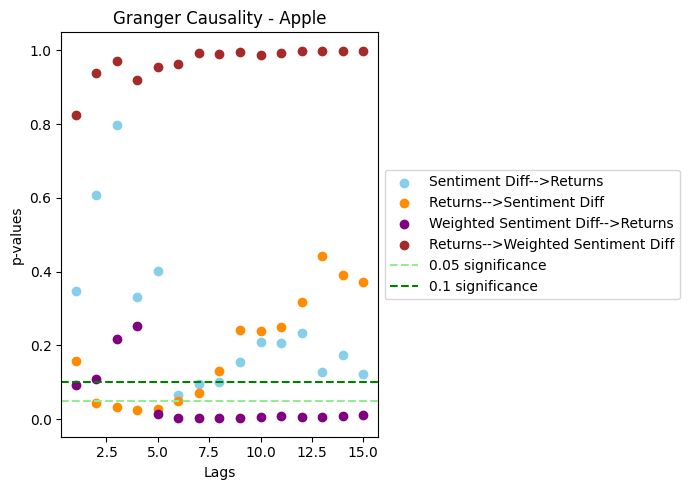

In [ ]:
plot_lag_p_values3(granger_output_apple,name="Apple",columns= ['p_values_S_R','p_values_R_S','p_values_S_R_RETweight','p_values_R_S_RETweight'],text=["Sentiment Diff-->Returns", "Returns-->Sentiment Diff", "Weighted Sentiment Diff-->Returns", "Returns-->Weighted Sentiment Diff"])

# GOOGLE SENTIMENT & WEIGHTED SENTIMENT DIFFERENTIAL

In [ ]:
#GOOGLE
# Set up the data for Google
google_interpolated = interpolate2(merged_sentiment_stockprice_google)
google_interpolated_2016_ = google_interpolated[google_interpolated.index >= "2016-01-01"].sentiment_difference.values

google_interpolatedW = interpolate3(merged_weighted_sentiment_stockprice_google)
google_interpolated_2016_W = google_interpolatedW[google_interpolatedW.index >= "2016-01-01"].weighted_sentiment_difference.values

google_prices_2016_ = google_data_daily[google_data_daily.index >= "2016-01-01"][["Adj Close"]].values

# Create DataFrames for sentiment and weighted sentiment
df_google_sentiment = pd.DataFrame(columns=['Cause', 'Effect'])
df_google_sentiment["Cause"] = google_interpolated_2016_[1:]
df_google_sentiment["Effect"] = np.log(google_prices_2016_[1:]/google_prices_2016_[:-1])
granger_google_sentiment = granger_causality_test(df_google_sentiment, max_lag=15)
granger_google_sentiment.rename(columns={'p_values': 'p_values_S_R'}, inplace=True)

df_google_sentimentR = pd.DataFrame(columns=['Cause', 'Effect'])
df_google_sentimentR["Cause"] = list(np.log(google_prices_2016_[1:]/google_prices_2016_[:-1]))
df_google_sentimentR["Effect"] = google_interpolated_2016_[1:]
granger_google_sentimentR = granger_causality_test(df_google_sentimentR, max_lag=15)
granger_google_sentimentR.rename(columns={'p_values': 'p_values_R_S'}, inplace=True)

# Differential sentiment and retweet-weighted sentiment
df_google_sentimentW = pd.DataFrame(columns=['Cause', 'Effect'])
df_google_sentimentW["Cause"] = google_interpolated_2016_W[1:]
df_google_sentimentW["Effect"] = np.log(google_prices_2016_[1:]/google_prices_2016_[:-1])
granger_google_sentimentW = granger_causality_test(df_google_sentimentW, max_lag=15)
granger_google_sentimentW.rename(columns={'p_values': 'p_values_S_R_RETweight'}, inplace=True)

df_google_sentimentRW = pd.DataFrame(columns=['Cause', 'Effect'])
df_google_sentimentRW["Cause"] = list(np.log(google_prices_2016_[1:]/google_prices_2016_[:-1]))
df_google_sentimentRW["Effect"] = google_interpolated_2016_W[1:]
granger_google_sentimentRW = granger_causality_test(df_google_sentimentRW, max_lag=15)
granger_google_sentimentRW.rename(columns={'p_values': 'p_values_R_S_RETweight'}, inplace=True)

# Combine all results into a single DataFrame
granger_output_google = granger_google_sentiment.merge(granger_google_sentimentR, on="Lag") \
                                                .merge(granger_google_sentimentW, on="Lag") \
                                                .merge(granger_google_sentimentRW, on="Lag")

granger_output_google


,Lag,p_values_S_R,p_values_R_S,p_values_S_R_RETweight,p_values_R_S_RETweight
0,1,0.002492,0.035393,0.000528,0.297547
1,2,0.011304,0.035658,0.001790,0.187146
2,3,0.009462,0.011225,0.003608,0.269365
3,4,0.013111,0.000767,0.007413,0.006115
4,5,0.014366,0.002420,0.007497,0.017827
5,6,0.018457,0.001717,0.013374,0.039153
6,7,0.026903,0.002893,0.023623,0.068476
7,8,0.041361,0.005842,0.039849,0.107460
8,9,0.049271,0.007508,0.063418,0.114061
9,10,0.071182,0.006502,0.089422,0.062496


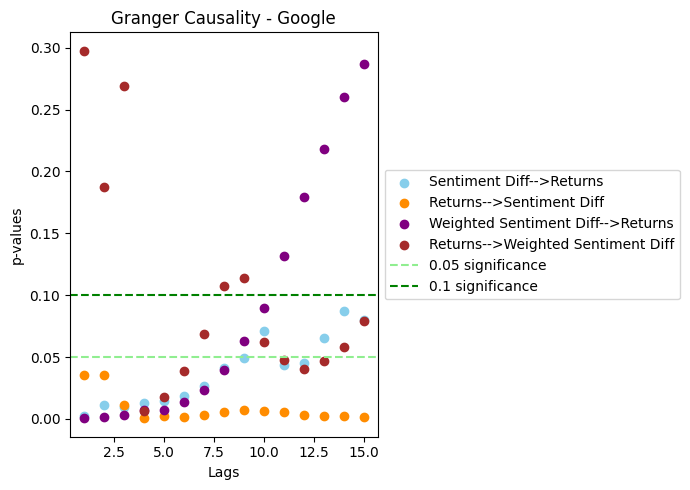

In [ ]:
plot_lag_p_values3(granger_output_google,name="Google",columns= ['p_values_S_R','p_values_R_S','p_values_S_R_RETweight','p_values_R_S_RETweight'],text=["Sentiment Diff-->Returns", "Returns-->Sentiment Diff", "Weighted Sentiment Diff-->Returns", "Returns-->Weighted Sentiment Diff"])

# AMAZON SENTIMENT & WEIGHTED SENTIMENT DIFFERENTIAL

In [ ]:
#AMAZON
# Set up the data for Amazon
amazon_interpolated = interpolate2(merged_sentiment_stockprice_amazon)
amazon_interpolated_2016_ = amazon_interpolated[amazon_interpolated.index >= "2016-01-01"].sentiment_difference.values

amazon_interpolatedW = interpolate3(merged_weighted_sentiment_stockprice_amazon)
amazon_interpolated_2016_W = amazon_interpolatedW[amazon_interpolatedW.index >= "2016-01-01"].weighted_sentiment_difference.values

amazon_prices_2016_ = amazon_data_daily[amazon_data_daily.index >= "2016-01-01"][["Adj Close"]].values

# Create DataFrames for sentiment and weighted sentiment
df_amazon_sentiment = pd.DataFrame(columns=['Cause', 'Effect'])
df_amazon_sentiment["Cause"] = amazon_interpolated_2016_[1:]
df_amazon_sentiment["Effect"] = np.log(amazon_prices_2016_[1:]/amazon_prices_2016_[:-1])
granger_amazon_sentiment = granger_causality_test(df_amazon_sentiment, max_lag=15)
granger_amazon_sentiment.rename(columns={'p_values': 'p_values_S_R'}, inplace=True)

df_amazon_sentimentR = pd.DataFrame(columns=['Cause', 'Effect'])
df_amazon_sentimentR["Cause"] = list(np.log(amazon_prices_2016_[1:]/amazon_prices_2016_[:-1]))
df_amazon_sentimentR["Effect"] = amazon_interpolated_2016_[1:]
granger_amazon_sentimentR = granger_causality_test(df_amazon_sentimentR, max_lag=15)
granger_amazon_sentimentR.rename(columns={'p_values': 'p_values_R_S'}, inplace=True)

# Differential sentiment and retweet-weighted sentiment
df_amazon_sentimentW = pd.DataFrame(columns=['Cause', 'Effect'])
df_amazon_sentimentW["Cause"] = amazon_interpolated_2016_W[1:]
df_amazon_sentimentW["Effect"] = np.log(amazon_prices_2016_[1:]/amazon_prices_2016_[:-1])
granger_amazon_sentimentW = granger_causality_test(df_amazon_sentimentW, max_lag=15)
granger_amazon_sentimentW.rename(columns={'p_values': 'p_values_S_R_RETweight'}, inplace=True)

df_amazon_sentimentRW = pd.DataFrame(columns=['Cause', 'Effect'])
df_amazon_sentimentRW["Cause"] = list(np.log(amazon_prices_2016_[1:]/amazon_prices_2016_[:-1]))
df_amazon_sentimentRW["Effect"] = amazon_interpolated_2016_W[1:]
granger_amazon_sentimentRW = granger_causality_test(df_amazon_sentimentRW, max_lag=15)
granger_amazon_sentimentRW.rename(columns={'p_values': 'p_values_R_S_RETweight'}, inplace=True)

# Combine all results into a single DataFrame
granger_output_amazon = granger_amazon_sentiment.merge(granger_amazon_sentimentR, on="Lag") \
                                                .merge(granger_amazon_sentimentW, on="Lag") \
                                                .merge(granger_amazon_sentimentRW, on="Lag")

granger_output_amazon


,Lag,p_values_S_R,p_values_R_S,p_values_S_R_RETweight,p_values_R_S_RETweight
0,1,0.006652,0.017774,0.019659,0.102054
1,2,0.009039,0.003496,0.019785,0.037418
2,3,0.012527,0.011583,0.012857,0.094892
3,4,0.015649,0.001007,0.025038,0.046680
4,5,0.003363,0.001417,0.009865,0.054626
5,6,0.006694,0.000219,0.018707,0.045983
6,7,0.009510,0.000377,0.007165,0.069480
7,8,0.009732,0.000423,0.011006,0.088455
8,9,0.008876,0.000434,0.013581,0.090794
9,10,0.013974,0.000928,0.019024,0.113231


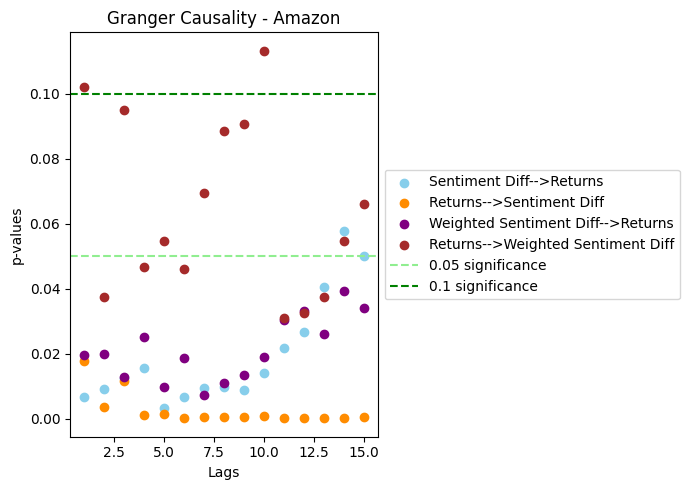

In [ ]:
plot_lag_p_values3(granger_output_amazon,name="Amazon",columns= ['p_values_S_R','p_values_R_S','p_values_S_R_RETweight','p_values_R_S_RETweight'],text=["Sentiment Diff-->Returns", "Returns-->Sentiment Diff", "Weighted Sentiment Diff-->Returns", "Returns-->Weighted Sentiment Diff"])

# MICROSOFT SENTIMENT & WEIGHTED SENTIMENT DIFFERENTIAL

In [ ]:
#MICROSOFT
# Set up the data for Microsoft
microsoft_interpolated = interpolate2(merged_sentiment_stockprice_microsoft)
microsoft_interpolated_2016_ = microsoft_interpolated[microsoft_interpolated.index >= "2016-01-01"].sentiment_difference.values

microsoft_interpolatedW = interpolate3(merged_weighted_sentiment_stockprice_microsoft)
microsoft_interpolated_2016_W = microsoft_interpolatedW[microsoft_interpolatedW.index >= "2016-01-01"].weighted_sentiment_difference.values

microsoft_prices_2016_ = microsoft_data_daily[microsoft_data_daily.index >= "2016-01-01"][["Adj Close"]].values

# Create DataFrames for sentiment and weighted sentiment
df_microsoft_sentiment = pd.DataFrame(columns=['Cause', 'Effect'])
df_microsoft_sentiment["Cause"] = microsoft_interpolated_2016_[1:]
df_microsoft_sentiment["Effect"] = np.log(microsoft_prices_2016_[1:]/microsoft_prices_2016_[:-1])
granger_microsoft_sentiment = granger_causality_test(df_microsoft_sentiment, max_lag=15)
granger_microsoft_sentiment.rename(columns={'p_values': 'p_values_S_R'}, inplace=True)

df_microsoft_sentimentR = pd.DataFrame(columns=['Cause', 'Effect'])
df_microsoft_sentimentR["Cause"] = list(np.log(microsoft_prices_2016_[1:]/microsoft_prices_2016_[:-1]))
df_microsoft_sentimentR["Effect"] = microsoft_interpolated_2016_[1:]
granger_microsoft_sentimentR = granger_causality_test(df_microsoft_sentimentR, max_lag=15)
granger_microsoft_sentimentR.rename(columns={'p_values': 'p_values_R_S'}, inplace=True)

# Differential sentiment and retweet-weighted sentiment
df_microsoft_sentimentW = pd.DataFrame(columns=['Cause', 'Effect'])
df_microsoft_sentimentW["Cause"] = microsoft_interpolated_2016_W[1:]
df_microsoft_sentimentW["Effect"] = np.log(microsoft_prices_2016_[1:]/microsoft_prices_2016_[:-1])
granger_microsoft_sentimentW = granger_causality_test(df_microsoft_sentimentW, max_lag=15)
granger_microsoft_sentimentW.rename(columns={'p_values': 'p_values_S_R_RETweight'}, inplace=True)

df_microsoft_sentimentRW = pd.DataFrame(columns=['Cause', 'Effect'])
df_microsoft_sentimentRW["Cause"] = list(np.log(microsoft_prices_2016_[1:]/microsoft_prices_2016_[:-1]))
df_microsoft_sentimentRW["Effect"] = microsoft_interpolated_2016_W[1:]
granger_microsoft_sentimentRW = granger_causality_test(df_microsoft_sentimentRW, max_lag=15)
granger_microsoft_sentimentRW.rename(columns={'p_values': 'p_values_R_S_RETweight'}, inplace=True)

# Combine all results into a single DataFrame
granger_output_microsoft = granger_microsoft_sentiment.merge(granger_microsoft_sentimentR, on="Lag") \
                                                       .merge(granger_microsoft_sentimentW, on="Lag") \
                                                       .merge(granger_microsoft_sentimentRW, on="Lag")

granger_output_microsoft


,Lag,p_values_S_R,p_values_R_S,p_values_S_R_RETweight,p_values_R_S_RETweight
0,1,0.867790,0.382137,0.581060,0.243585
1,2,0.926402,0.571868,0.823620,0.498800
2,3,0.508614,0.781147,0.941905,0.653195
3,4,0.085155,0.816299,0.699102,0.287056
4,5,0.113469,0.837600,0.739667,0.277602
5,6,0.179248,0.874769,0.819205,0.312586
6,7,0.246749,0.838135,0.886331,0.391337
7,8,0.299719,0.907664,0.935825,0.268791
8,9,0.366294,0.535525,0.966437,0.349757
9,10,0.451848,0.622314,0.965139,0.402289


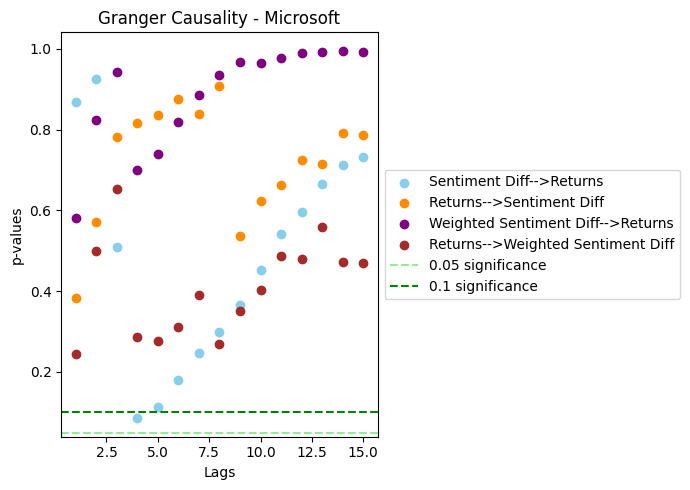

In [ ]:
plot_lag_p_values3(granger_output_microsoft,name="Microsoft",columns= ['p_values_S_R','p_values_R_S','p_values_S_R_RETweight','p_values_R_S_RETweight'],text=["Sentiment Diff-->Returns", "Returns-->Sentiment Diff", "Weighted Sentiment Diff-->Returns", "Returns-->Weighted Sentiment Diff"])

# NETFLIX SENTIMENT & WEIGHTED SENTIMENT DIFFERENTIAL

In [ ]:
# Set up the data for Netflix
netflix_interpolated = interpolate2(merged_sentiment_stockprice_netflix)
netflix_interpolated_2016_ = netflix_interpolated[netflix_interpolated.index >= "2016-01-01"].sentiment_difference.values

netflix_interpolatedW = interpolate3(merged_weighted_sentiment_stockprice_netflix)
netflix_interpolated_2016_W = netflix_interpolatedW[netflix_interpolatedW.index >= "2016-01-01"].weighted_sentiment_difference.values

netflix_prices_2016_ = netflix_data_daily[netflix_data_daily.index >= "2016-01-01"][["Adj Close"]].values

# Create DataFrames for sentiment and weighted sentiment
df_netflix_sentiment = pd.DataFrame(columns=['Cause', 'Effect'])
df_netflix_sentiment["Cause"] = netflix_interpolated_2016_[1:]
df_netflix_sentiment["Effect"] = np.log(netflix_prices_2016_[1:]/netflix_prices_2016_[:-1])
granger_netflix_sentiment = granger_causality_test(df_netflix_sentiment, max_lag=15)
granger_netflix_sentiment.rename(columns={'p_values': 'p_values_S_R'}, inplace=True)

df_netflix_sentimentR = pd.DataFrame(columns=['Cause', 'Effect'])
df_netflix_sentimentR["Cause"] = list(np.log(netflix_prices_2016_[1:]/netflix_prices_2016_[:-1]))
df_netflix_sentimentR["Effect"] = netflix_interpolated_2016_[1:]
granger_netflix_sentimentR = granger_causality_test(df_netflix_sentimentR, max_lag=15)
granger_netflix_sentimentR.rename(columns={'p_values': 'p_values_R_S'}, inplace=True)

# Differential sentiment and retweet-weighted sentiment
df_netflix_sentimentW = pd.DataFrame(columns=['Cause', 'Effect'])
df_netflix_sentimentW["Cause"] = netflix_interpolated_2016_W[1:]
df_netflix_sentimentW["Effect"] = np.log(netflix_prices_2016_[1:]/netflix_prices_2016_[:-1])
granger_netflix_sentimentW = granger_causality_test(df_netflix_sentimentW, max_lag=15)
granger_netflix_sentimentW.rename(columns={'p_values': 'p_values_S_R_RETweight'}, inplace=True)

df_netflix_sentimentRW = pd.DataFrame(columns=['Cause', 'Effect'])
df_netflix_sentimentRW["Cause"] = list(np.log(netflix_prices_2016_[1:]/netflix_prices_2016_[:-1]))
df_netflix_sentimentRW["Effect"] = netflix_interpolated_2016_W[1:]
granger_netflix_sentimentRW = granger_causality_test(df_netflix_sentimentRW, max_lag=15)
granger_netflix_sentimentRW.rename(columns={'p_values': 'p_values_R_S_RETweight'}, inplace=True)

# Combine all results into a single DataFrame
granger_output_netflix = granger_netflix_sentiment.merge(granger_netflix_sentimentR, on="Lag") \
                                                   .merge(granger_netflix_sentimentW, on="Lag") \
                                                   .merge(granger_netflix_sentimentRW, on="Lag")

granger_output_netflix


,Lag,p_values_S_R,p_values_R_S,p_values_S_R_RETweight,p_values_R_S_RETweight
0,1,0.000547,0.267423,0.076067,0.419881
1,2,0.000974,0.021904,0.172177,0.411210
2,3,0.003161,0.085023,0.113421,0.705863
3,4,0.005305,0.064919,0.196627,0.852952
4,5,0.009385,0.122792,0.175637,0.648455
5,6,0.018534,0.105146,0.232380,0.498503
6,7,0.032219,0.131850,0.263484,0.602230
7,8,0.032938,0.179739,0.284058,0.599124
8,9,0.039031,0.143997,0.179933,0.553789
9,10,0.002058,0.193045,0.195496,0.629779


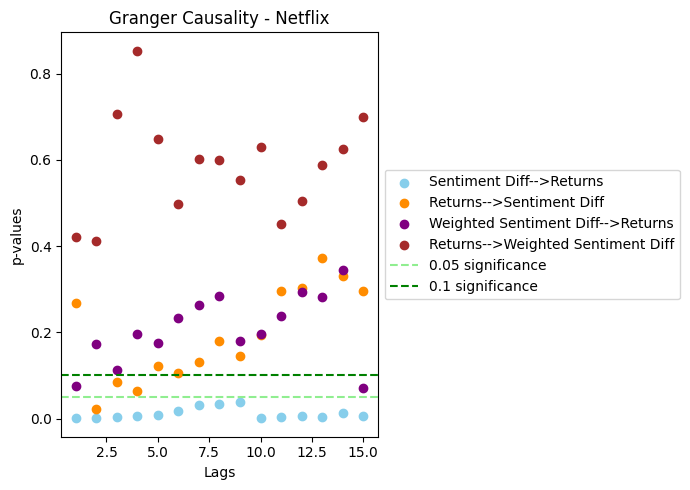

In [ ]:
plot_lag_p_values3(granger_output_netflix,name="Netflix",columns= ['p_values_S_R','p_values_R_S','p_values_S_R_RETweight','p_values_R_S_RETweight'],text=["Sentiment Diff-->Returns", "Returns-->Sentiment Diff", "Weighted Sentiment Diff-->Returns", "Returns-->Weighted Sentiment Diff"])

# TESLA SENTIMENT & WEIGHTED SENTIMENT DIFFERENTIAL

In [ ]:
#TESLA
# Set up the data for Tesla
tesla_interpolated = interpolate2(merged_sentiment_stockprice_tesla)
tesla_interpolated_2016_ = tesla_interpolated[tesla_interpolated.index >= "2016-01-01"].sentiment_difference.values

tesla_interpolatedW = interpolate3(merged_weighted_sentiment_stockprice_tesla)
tesla_interpolated_2016_W = tesla_interpolatedW[tesla_interpolatedW.index >= "2016-01-01"].weighted_sentiment_difference.values

tesla_prices_2016_ = tesla_data_daily[tesla_data_daily.index >= "2016-01-01"][["Adj Close"]].values

# Create DataFrames for sentiment and weighted sentiment
df_tesla_sentiment = pd.DataFrame(columns=['Cause', 'Effect'])
df_tesla_sentiment["Cause"] = tesla_interpolated_2016_[1:]
df_tesla_sentiment["Effect"] = np.log(tesla_prices_2016_[1:]/tesla_prices_2016_[:-1])
granger_tesla_sentiment = granger_causality_test(df_tesla_sentiment, max_lag=15)
granger_tesla_sentiment.rename(columns={'p_values': 'p_values_S_R'}, inplace=True)

df_tesla_sentimentR = pd.DataFrame(columns=['Cause', 'Effect'])
df_tesla_sentimentR["Cause"] = list(np.log(tesla_prices_2016_[1:]/tesla_prices_2016_[:-1]))
df_tesla_sentimentR["Effect"] = tesla_interpolated_2016_[1:]
granger_tesla_sentimentR = granger_causality_test(df_tesla_sentimentR, max_lag=15)
granger_tesla_sentimentR.rename(columns={'p_values': 'p_values_R_S'}, inplace=True)

# Differential sentiment and retweet-weighted sentiment
df_tesla_sentimentW = pd.DataFrame(columns=['Cause', 'Effect'])
df_tesla_sentimentW["Cause"] = tesla_interpolated_2016_W[1:]
df_tesla_sentimentW["Effect"] = np.log(tesla_prices_2016_[1:]/tesla_prices_2016_[:-1])
granger_tesla_sentimentW = granger_causality_test(df_tesla_sentimentW, max_lag=15)
granger_tesla_sentimentW.rename(columns={'p_values': 'p_values_S_R_RETweight'}, inplace=True)

df_tesla_sentimentRW = pd.DataFrame(columns=['Cause', 'Effect'])
df_tesla_sentimentRW["Cause"] = list(np.log(tesla_prices_2016_[1:]/tesla_prices_2016_[:-1]))
df_tesla_sentimentRW["Effect"] = tesla_interpolated_2016_W[1:]
granger_tesla_sentimentRW = granger_causality_test(df_tesla_sentimentRW, max_lag=15)
granger_tesla_sentimentRW.rename(columns={'p_values': 'p_values_R_S_RETweight'}, inplace=True)

# Combine all results into a single DataFrame
granger_output_tesla = granger_tesla_sentiment.merge(granger_tesla_sentimentR, on="Lag") \
                                              .merge(granger_tesla_sentimentW, on="Lag") \
                                              .merge(granger_tesla_sentimentRW, on="Lag")

granger_output_tesla


,Lag,p_values_S_R,p_values_R_S,p_values_S_R_RETweight,p_values_R_S_RETweight
0,1,0.067623,0.000058,0.004846,0.003078
1,2,0.128165,0.000168,0.040034,0.009441
2,3,0.009279,0.000311,0.046198,0.025514
3,4,0.003432,0.000591,0.088654,0.034704
4,5,0.006319,0.001016,0.144054,0.045710
5,6,0.009808,0.001731,0.197866,0.077733
6,7,0.023391,0.003758,0.272162,0.102004
7,8,0.014029,0.005586,0.369670,0.118185
8,9,0.011589,0.007475,0.438402,0.111300
9,10,0.015630,0.010710,0.533494,0.147873


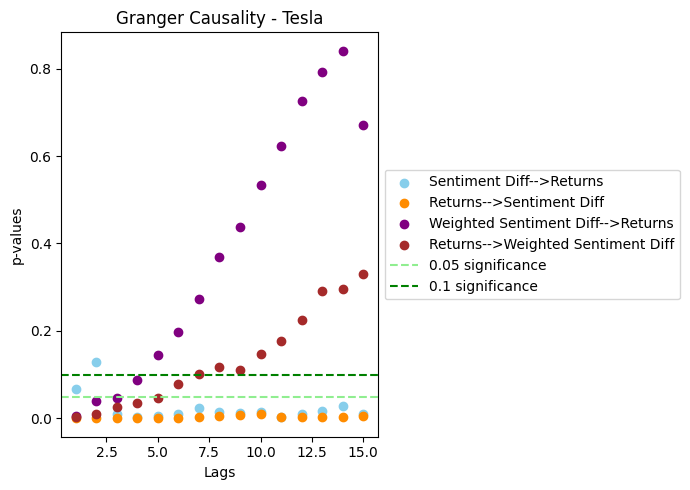

In [ ]:
plot_lag_p_values3(granger_output_tesla,name="Tesla",columns= ['p_values_S_R','p_values_R_S','p_values_S_R_RETweight','p_values_R_S_RETweight'],text=["Sentiment Diff-->Returns", "Returns-->Sentiment Diff", "Weighted Sentiment Diff-->Returns", "Returns-->Weighted Sentiment Diff"])